# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [274]:
#Import all the necessary modules


# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [275]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [276]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, auc

In [277]:
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [278]:
from sklearn.linear_model import LogisticRegression

In [279]:
# Since it is a data file with no header, we will supply the column names which have been obtained from the above URL 
# Create a python list of column names called "names"
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

#Load the file from local directory using pd.read_csv which is a special form of read_table
#while reading the data, supply the "colnames" list
pima_df = pd.read_csv("pima-indians-diabetes.data", names= colnames)

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [280]:
pima_df.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [281]:
pima_df.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [282]:
pima_df.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [283]:
# pima_df.replace(0,np.NAN,inplace=True)
# pima_df.fillna(pima_df.median(),inplace=True)

In [284]:
median_preg = pima_df['preg'].mean(skipna=True)
pima_df=pima_df.replace({'preg': {0: median_preg}}) 

median_plas = pima_df['plas'].mean(skipna=True)
pima_df=pima_df.replace({'plas': {0: median_plas}}) 

median_pres = pima_df['pres'].mean(skipna=True)
pima_df=pima_df.replace({'pres': {0: median_pres}}) 

median_skin = pima_df['skin'].mean(skipna=True)
pima_df=pima_df.replace({'skin': {0: median_skin}}) 

median_test = pima_df['test'].mean(skipna=True)
pima_df=pima_df.replace({'test': {0: median_test}}) 

median_mass = pima_df['mass'].mean(skipna=True)
pima_df=pima_df.replace({'mass': {0: median_mass}}) 

median_pedi = pima_df['pedi'].mean(skipna=True)
pima_df=pima_df.replace({'pedi': {0: median_pedi}}) 

median_age = pima_df['age'].mean(skipna=True)
pima_df=pima_df.replace({'age': {0: median_age}}) 

In [285]:
pima_df.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6.000000,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1.000000,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,8.000000,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,1.000000,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,3.845052,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5.000000,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,3.000000,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,10.000000,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,2.000000,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,8.000000,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [286]:
pima_df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


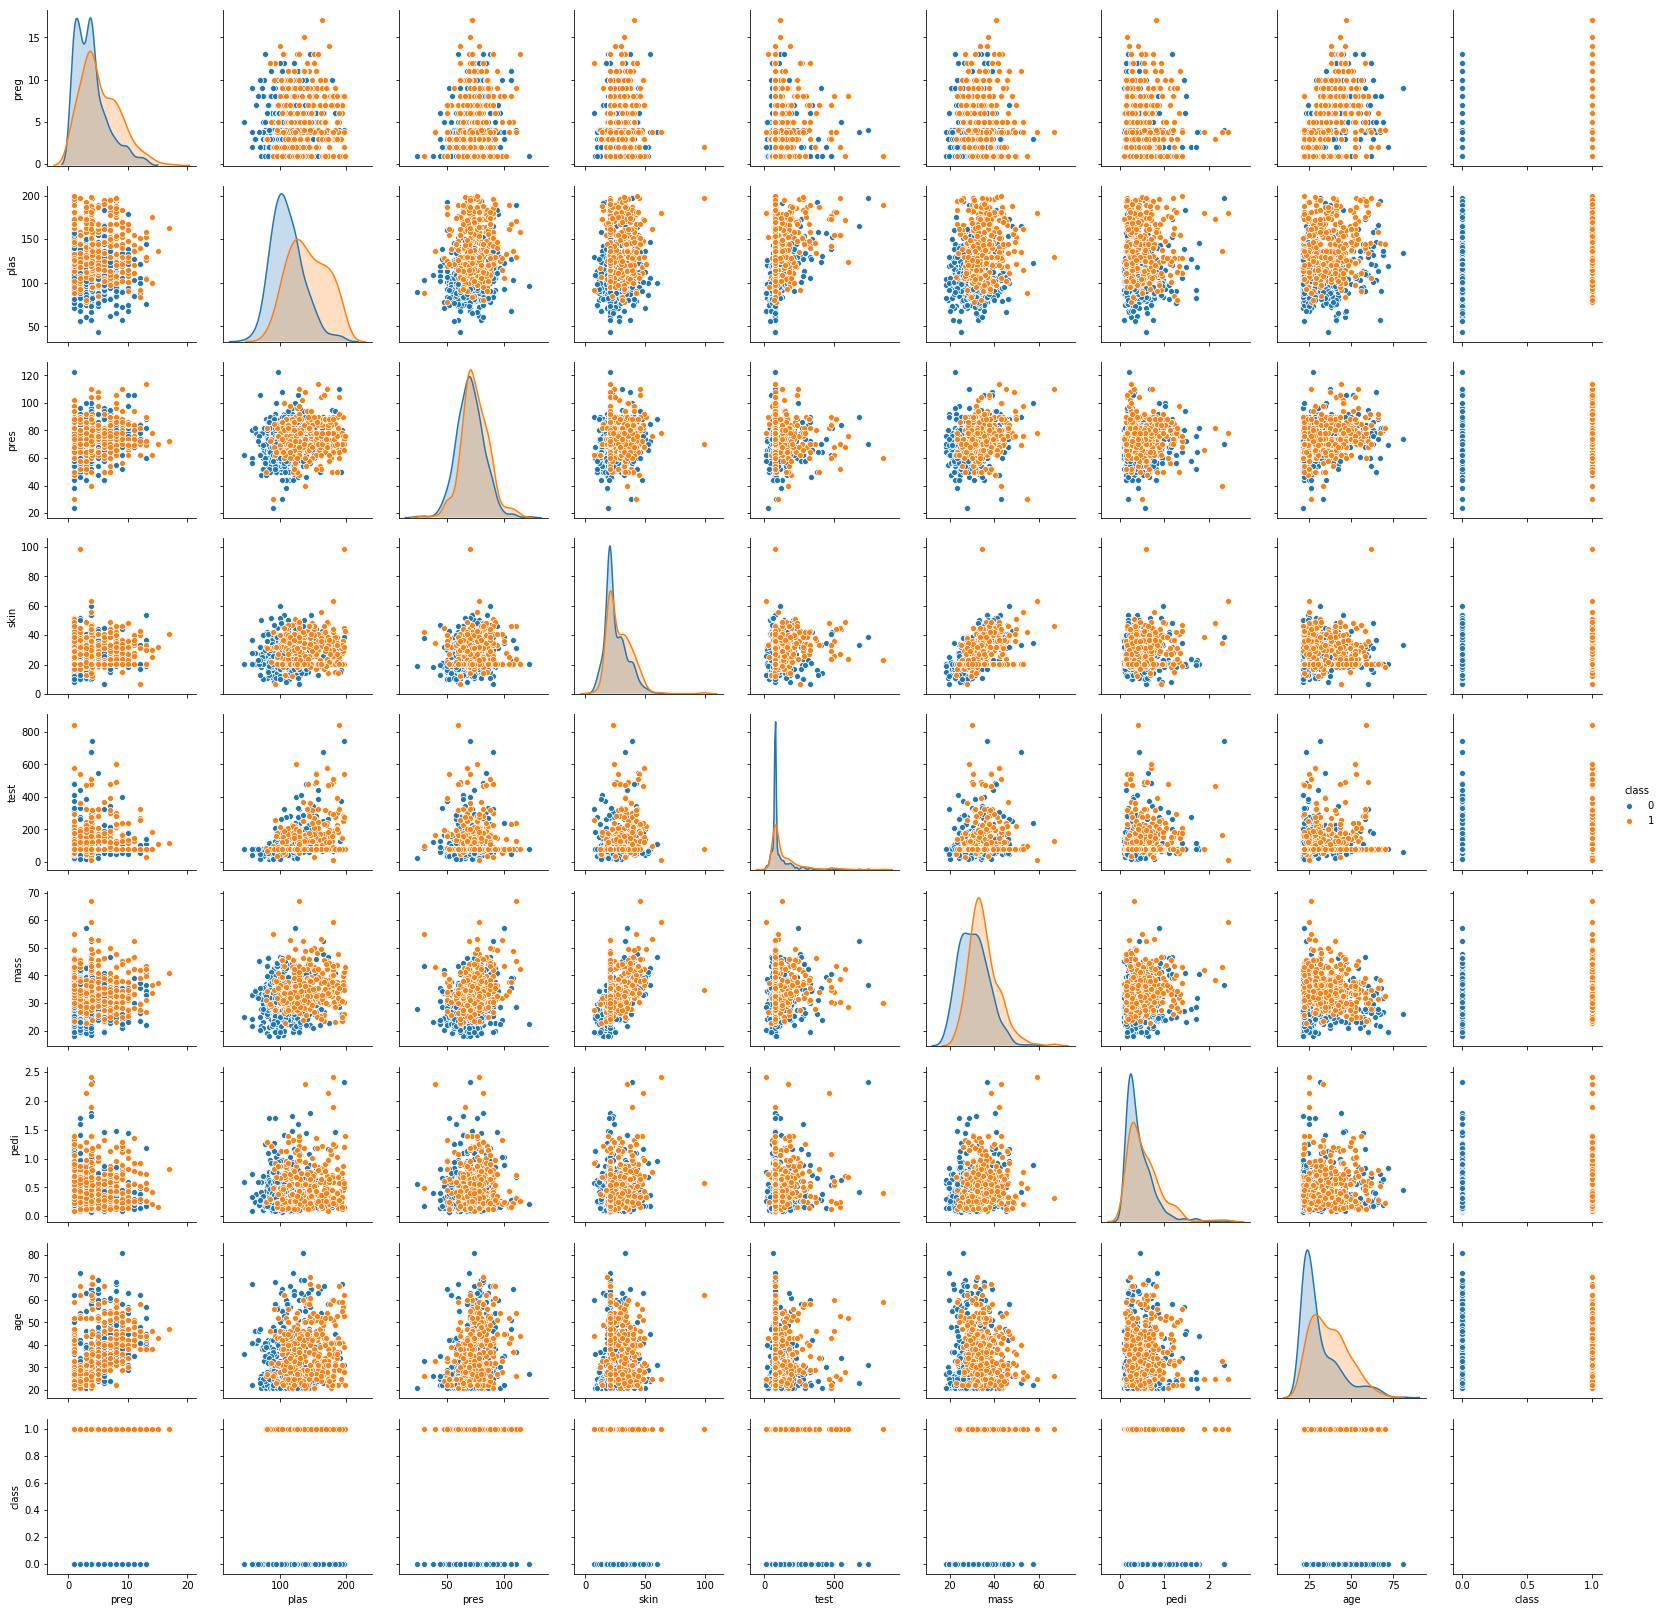

In [287]:
import seaborn as sns
sns.pairplot(pima_df, hue = "class")

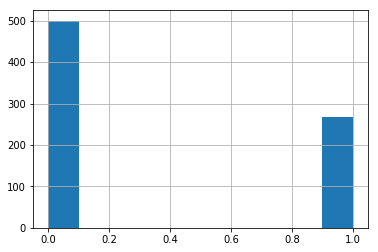

In [288]:
pima_df['class'].hist()

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


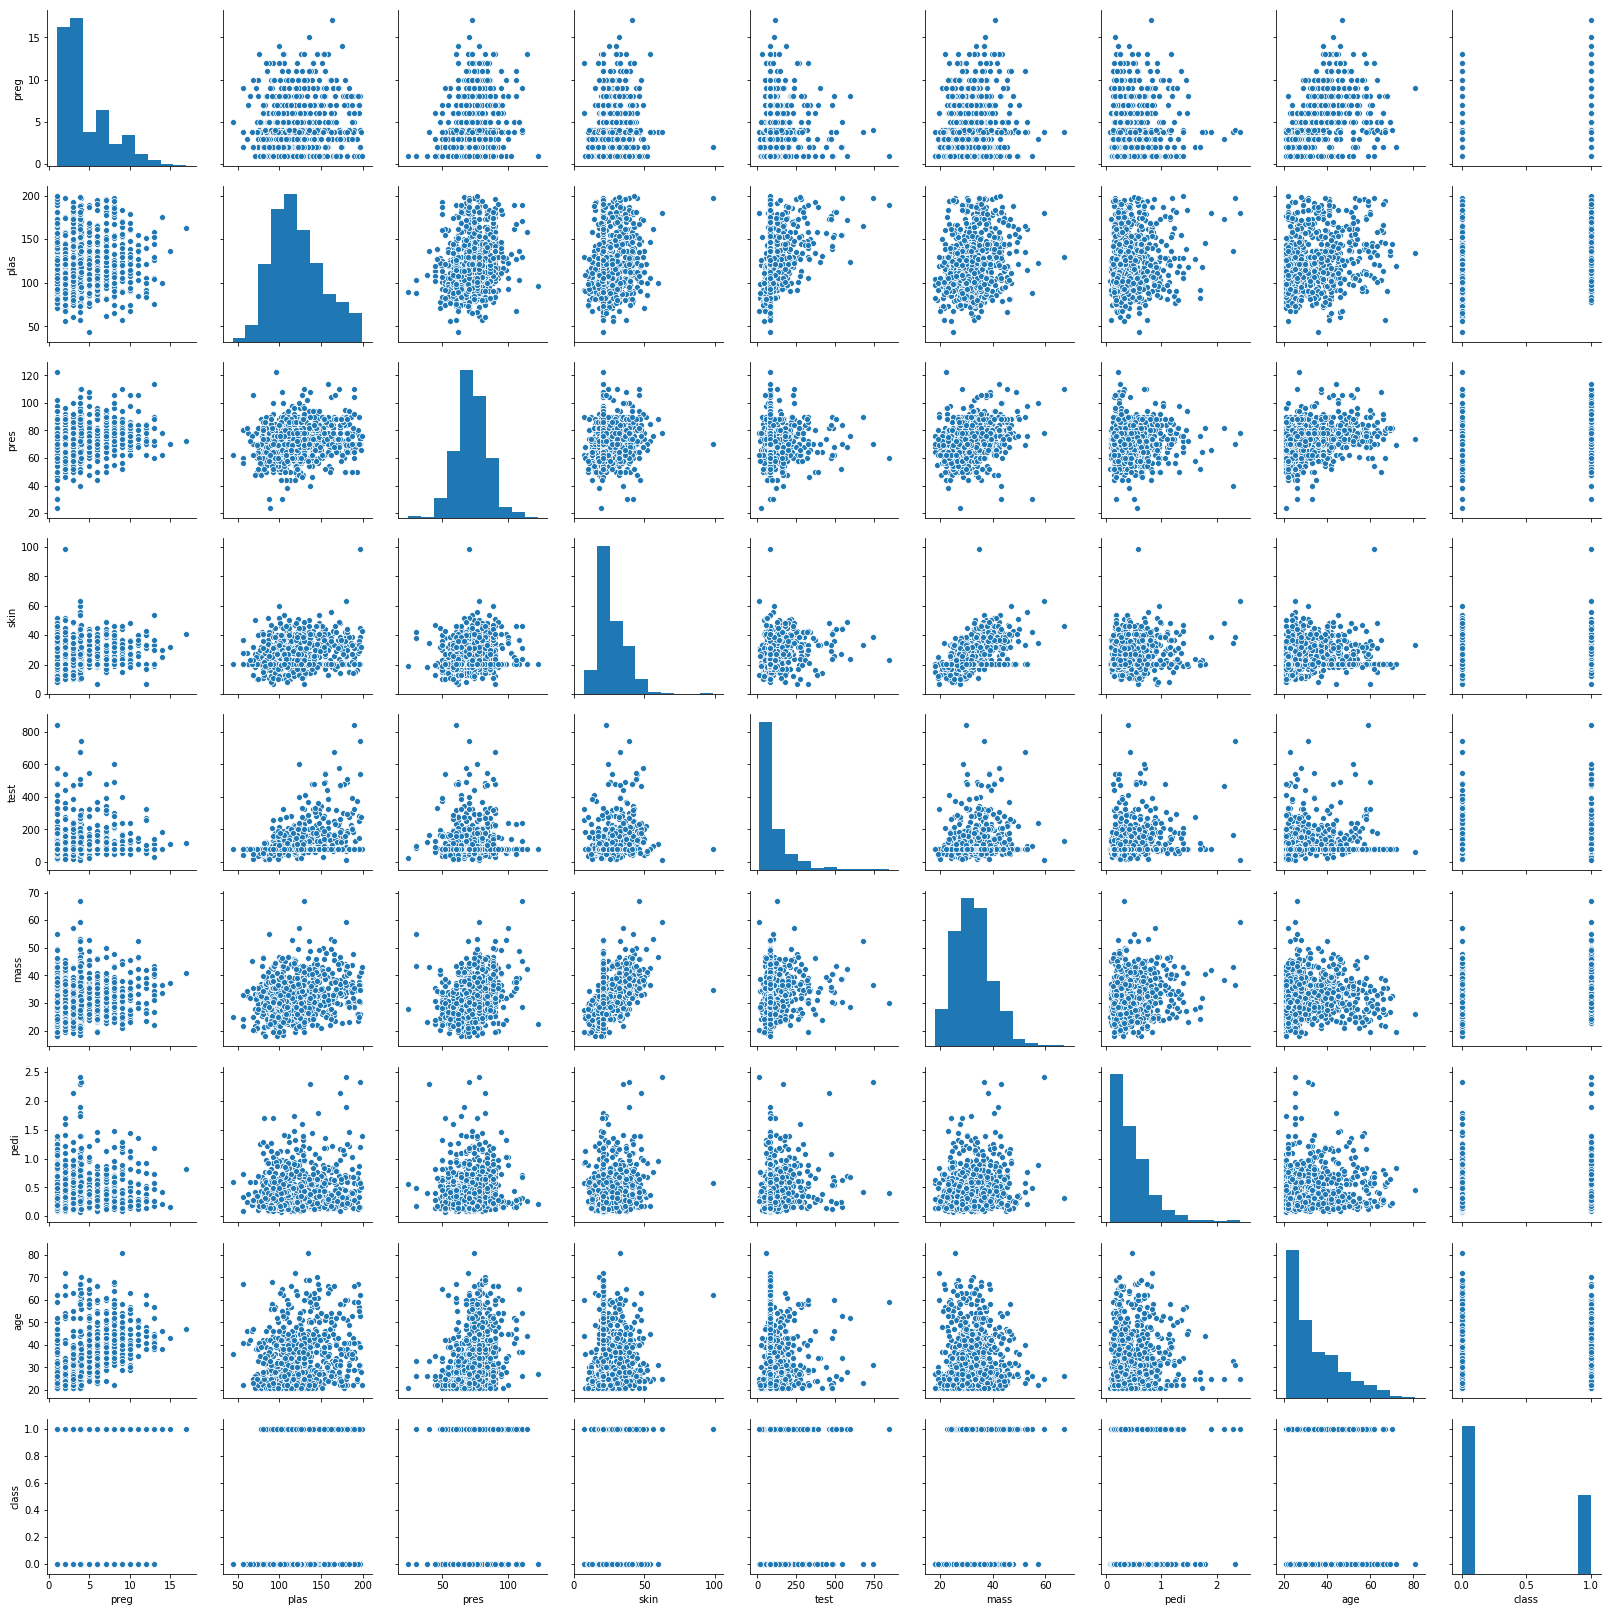

In [203]:
# Pairplot using sns
import seaborn as sns
sns.pairplot(pima_df)

In [204]:
pima_df.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.152568,0.253275,0.045776,-0.016738,0.097663,-0.010297,0.525261,0.247971
plas,0.152568,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
pres,0.253275,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
skin,0.045776,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
test,-0.016738,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
mass,0.097663,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
pedi,-0.010297,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
age,0.525261,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
class,0.247971,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


Using the plot - infer the relationship between different variables

In [205]:
# Plasma Glucose has a positive corelation with the Diabetes class value
# Mass has a positive corelation with the Diabetes class value
# Mass and Skin are positively corelated

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [206]:
X = pima_df.drop("class" , axis=1)
y = pima_df.pop("class")

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [208]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 7, min_samples_split = 3 )

In [209]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [210]:
model.score(X_test, y_test)

0.7316017316017316

# Q10 Print the accuracy of the model & print the confusion matrix 

In [211]:
predicted_dt = model.predict(X_test)

In [212]:
metrics.confusion_matrix(y_test, predicted_dt)

array([[112,  34],
       [ 28,  57]])

In [213]:
from sklearn.metrics import roc_curve, auc
y_predictProb = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.7617244157937149

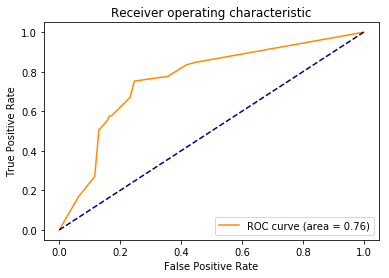

In [214]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [215]:
thresholds[8]

0.5454545454545454

In [216]:
THRESHOLD = 0.33
preds = np.where(model.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test, preds), 
                   recall_score(y_test, preds),
                   precision_score(y_test, preds)], 
             index=["accuracy", "recall", "precision"])

,0
accuracy,0.753247
recall,0.752941
precision,0.640000


Print the feature importance of the decision model - Optional

In [217]:
print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns))

           Imp
preg  0.053787
plas  0.343101
pres  0.087084
skin  0.034757
test  0.020481
mass  0.290214
pedi  0.050577
age   0.119998


# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [218]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 50)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [219]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [220]:
model_rf.score(X_test,y_test)

0.7662337662337663

In [221]:
predicted_rf = model_rf.predict(X_test)

In [222]:
metrics.confusion_matrix(y_test, predicted_rf)

array([[128,  18],
       [ 36,  49]])

In [223]:
y_predictProb = model_rf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.8430701047542305

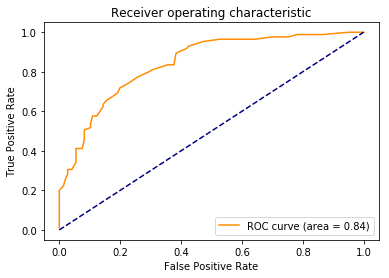

In [224]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [225]:
thresholds[27]

0.34

In [226]:
THRESHOLD = 0.3
preds = np.where(model_rf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test, preds), 
                   recall_score(y_test, preds),
                   precision_score(y_test, preds)], 
             index=["accuracy", "recall", "precision"])

,0
accuracy,0.735931
recall,0.811765
precision,0.605263


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [227]:
from sklearn.ensemble import AdaBoostClassifier
model_ad = AdaBoostClassifier(base_estimator=model, n_estimators=10, learning_rate = 10)

In [228]:
model_ad.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=10, n_estimators=10, random_state=None)

In [229]:
model_ad.score(X_test,y_test)

0.6363636363636364

In [230]:
predicted_ad = model_ad.predict(X_test)

In [231]:
metrics.confusion_matrix(y_test, predicted_ad)

array([[102,  44],
       [ 40,  45]])

In [232]:
y_predictProb = model_ad.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.7080177276390008

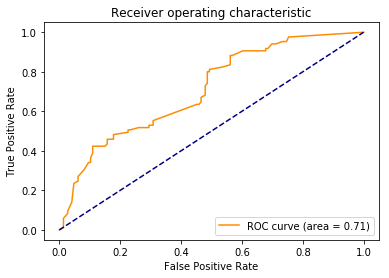

In [233]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [234]:
thresholds[44]

0.06785810625356138

In [235]:
THRESHOLD = 0.09
preds = np.where(model_ad.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test, preds), 
                   recall_score(y_test, preds),
                   precision_score(y_test, preds)], 
             index=["accuracy", "recall", "precision"])

,0
accuracy,0.597403
recall,0.823529
precision,0.472973


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [236]:
from sklearn.ensemble import BaggingClassifier
model_bg = BaggingClassifier(base_estimator=model, n_estimators=100, max_samples = 100)

In [237]:
model_bg.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [238]:
model_bg.score(X_test,y_test)

0.7835497835497836

In [239]:
predicted_bg = model_bg.predict(X_test)

In [240]:
metrics.confusion_matrix(y_test, predicted_bg)

array([[130,  16],
       [ 34,  51]])

In [241]:
y_predictProb = model_bg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.876228847703465

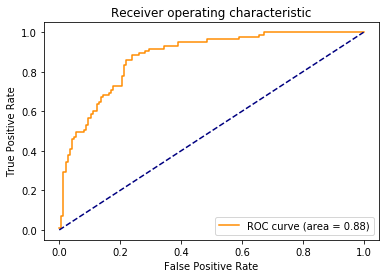

In [242]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [243]:
thresholds[43]

0.40598110147879973

In [244]:
THRESHOLD = 0.37
preds = np.where(model_bg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test, preds), 
                   recall_score(y_test, preds),
                   precision_score(y_test, preds)], 
             index=["accuracy", "recall", "precision"])

,0
accuracy,0.800866
recall,0.835294
precision,0.689320


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [245]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(n_estimators = 100)

In [246]:
model_gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [247]:
model_gb.score(X_test,y_test)

0.8008658008658008

In [248]:
predicted_gb = model_gb.predict(X_test)

In [249]:
metrics.confusion_matrix(y_test, predicted_gb)

array([[127,  19],
       [ 27,  58]])

In [250]:
y_predictProb = model_gb.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[:,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.8763094278807414

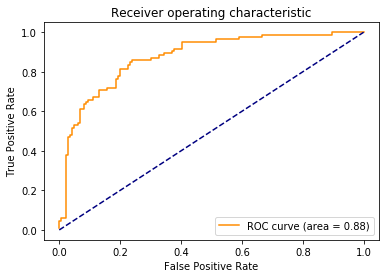

In [251]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [252]:
THRESHOLD = 0.2
preds = np.where(model_gb.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test, preds), 
                   recall_score(y_test, preds),
                   precision_score(y_test, preds)], 
             index=["accuracy", "recall", "precision"])

,0
accuracy,0.718615
recall,0.917647
precision,0.573529


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [253]:
from sklearn.ensemble import VotingClassifier

In [269]:
model_v = VotingClassifier(estimators=[('lr', model_rf), ('rf', model_gb)], voting='soft',weights=[2, 5])

In [270]:
model_v.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_we...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=[2, 5])

In [271]:
model_v.score(X_test,y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8138528138528138

In [ ]:
model